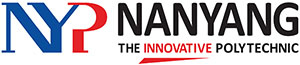


# Practical: Tensorflow - Machine Learning



# Objectives

- Understand how to apply optimization in Tensorflow
- Demonstrate how Tensorflow can be used for training a predictive model
- Apply Tensorflow to train a Linear Regression model
- Use tf.data and TFRecord


# Introduction

We have previously seen how we can use Tensorflow to create a tensors, computational graph and compute formulae. 

One important aspect of Tensorflow is its capability to perform optimization. If we provide Tensorflow with a loss function and a set of training variables, we can use it to easily get a set of values that minimizes the cost function.  Optimizers are crucial in machine training as it is a core part of the model training process.

In this practical, we will demonstrate this through the use of a simple dataset and use it to train a linear regression model using an optimizer.

We first see how we can apply that using simple linear regression, that is, given a single variable x, we try to determine the equation y = wx + b. Where w is the slope and b is the intercept.

Note that training a linear regrssion model is not the focus of this practical, we are simply using it for illusrating the optimizers in Tensorflow that can be used for training machine learning models. In a later practical, we will look at how optimizers can be used in neural networks.

Before we start, we will first need to import the following packages:
1. numpy
2. tensorflow
3. matplotlib.pyplot

Add the codes to import the 3 modules as follows:

```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
```


In [ ]:
#Import the packages numpy (as np), tensorflow (as tf) and matplotlib.pyplot (as plt)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



# Part 1: Simple Linear Regression

We will first generate some simple data that is suitable for a simple linear regression for us to practise on.

## Generating Data

Add the following codes to generate a set of x and y values which will act as our training data:

```python
#Generates 200 (x, y) data points
sample_count = 200

#Specify a seed for the random number generated
np.random.seed(seed=42)

#The np.linspace function return an event distributed numbers
#In the code below, 200 float64 numbers between -1 and 1 will be generated
x_train = np.linspace(-1, 1, sample_count, dtype=np.float64)
#We will generated y_train from the x_train
#y = 2 * x (+ some random noise)
y_train = 2 * x_train + np.random.randn(sample_count) * 0.5
```

In [ ]:
#Enter your codes here
# Generates 200 (x, y) data points
sample_count = 200

# Specify a seed for the random number generated
np.random.seed(seed=42)

# The np.linspace function return an event distributed numbers
# In the code below, 200 float64 numbers between -1 and 1 will be generated
x_train = np.linspace(-1, 1, sample_count, dtype=np.float64)
# We will generated y_train from the x_train
# y = 2 * x (+ some random noise)
y_train = 2 * x_train + np.random.randn(sample_count) * 0.5


Recall that equation for simple linear regression is 

${y^{'} = w \times x + b}$

where

${y^{'}}$ = predicted value,
${w}$ = Slope or gradient,
${x}$ = input value,
${b}$ = y intercept (value of y when x is 0)

In the above codes, we have generated 200 training examples. Our data has a value of 2 for the slope (w=2.0) and 0 for y-intercept (b=0.0). We have also introduced some random values into the data to simulate natural errors and noise.

We will be training a linear regression model based on the data above, the closer our model is to w=2.0 and b=0.0, the better the model is. 

(We generated the data and hence knows the ground truth, in real life, we will not have this luxury and has to rely on testing data.)


## Visualize Our Generated Data

Let us visualize our generated dataset using a scatter plot.

Add the following codes to plot the x_train and y_train on a x-y axes:

```python
#Plot a scatter plot using matplotlib
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```

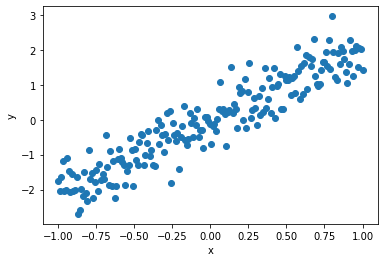

In [ ]:
#Enter your codes here
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


From the scatter plot, you should see that x is linearly correlated to y as we have generated the data using a linear equation.

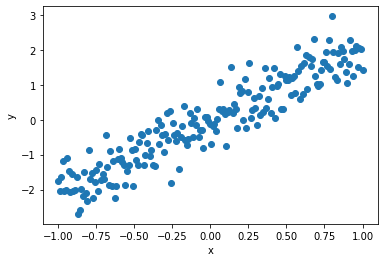

This means that our model should be able to accurately derive a value of w that is very close to 2. 

### Learning Rates, Epoch

The training process can be tuned via the learning rate as well as the epoch. Epoch refers to the number of times the training process iterates through the entire training set.

Define the learning rate and epoch as follows:

```python
learning_rate = 0.01
epoch = 10
```

The smaller the value of learning_rate and the larger the number of epoch, the longer the training process will take.

In [ ]:
#Declare a learning_rate and epoch here
learning_rate = 0.01
epoch = 10


### Loss Function

The optimization process requires a loss function, a function used by the optimizer to determine the best values of some variables. It does this by trying the find the best values that minimizes the loss function. 

This is best illustrated with our linear regression example. In a simple linear regression, the predicted value is

${y^{'} = w \times x + b}$

__Our objective is to find values for w and b such that the actual value of y and the predicted value of y is minimized__, in other words

Find w and b such that (y - y') is minimized 

We let loss = ${(y - y')^2}$

Since ${y^{'} = w \times x + b}$, then our loss becomes

loss = ${(y - (w \times x + b))^2}$

In Python codes, we define our loss function as 

```python
loss = lambda : (Y - (w * X + b))**2
```

Enter the loss function in the cell below.

In [ ]:
#Define the lambda loss function here
loss = lambda : (Y - (w * X + b))**2

### Defining the Optimizer

TensorFlow offers a few optimizers using various different algorithms. One of the most classic and well-known optimization algorithm is stochastic gradent descent (SGD). Other well-known optimizers provided by TensorFlow includes the _Adam_ and _RMSprop_ optimizers.

Create a new instance of the optimizer as follows:

```python
#Create a new instance of stochastic gradient descent optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate)
```

We pass in the learning_rate that we defined previously.

In [ ]:
#Create a new optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate)


### Declaring Trainable Variables

We need to find the optimal values for variables w and b in the equation y = wx + b.

So declare two variables w and b with initial values of 1.0.

```python
#Define a variable for the slope w
w = tf.Variable(1.0, name="w", dtype=tf.float64, trainable=True)

#Define a variable for the y-intercept b
b = tf.Variable(1.0, name="b", dtype=tf.float64, trainable=True)
```

Note that we indicate the variables to be trainable. Actually, the trainable attribute is set to ```True``` by default for all TensorFlow variables, we add it in the codes to remind ourselves that they are the variables that we are searching the best values for.

In [ ]:
#Declare the 2 variables here
# Define a variable for the slope w
w = tf.Variable(1.0, name="w", dtype=tf.float64, trainable=True)

# Define a variable for the y-intercept b
b = tf.Variable(1.0, name="b", dtype=tf.float64, trainable=True)


### The Training Process

We can now start the training operation.

Add the following codes to run the training _epoch_ number of times. During each iteration, we will optimize the variables w and b.

```python

#Run the training epoch number of times
for ep in range(epoch):
    print("Epoch:", ep)
    #In each epoch, run the optimization through all the data in 
    #x_train and y_train
    for (x, y) in zip(x_train, y_train):
        #Assign training data x to Variable X
        X = tf.Variable(x, name="X", dtype=tf.float64, trainable=False)
        #Assign training data y to Variable Y
        Y = tf.Variable(y, name="Y", dtype=tf.float64, trainable=False)
        #Find better value of w and b with the loss function defined
        sgd_optimizer.minimize(loss, [w, b])
```

In [ ]:
#Enter codes for training operations here
# Run the training epoch number of times
for ep in range(epoch):
    print("Epoch:", ep)
    #In each epoch, run the optimization through all the data in 
    #x_train and y_train
    for (x, y) in zip(x_train, y_train):
        #Assign training data x to Variable X
        X = tf.Variable(x, name="X", dtype=tf.float64, trainable=False)
        #Assign training data y to Variable Y
        Y = tf.Variable(y, name="Y", dtype=tf.float64, trainable=False)
        #Find better value of w and b with the loss function defined
        sgd_optimizer.minimize(loss, [w, b])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


Once the training is completed, we can print out the values of w and b.

```python
print(w)
print(b)
```

In [ ]:
#Print out the values of w and b here
print(w)
print(b)



<tf.Variable 'w:0' shape=() dtype=float64, numpy=2.0180813007069607>
<tf.Variable 'b:0' shape=() dtype=float64, numpy=-0.02449646191877978>


You should see similar values as that shown below:
```
<tf.Variable 'w:0' shape=() dtype=float64, numpy=1.9362601121404268>
<tf.Variable 'b:0' shape=() dtype=float64, numpy=-0.08402370370291071>
```

Our value of  w is actually pretty near 2, we get 1.94 and the value of b is 0.084 which is also close to 0.

The linear equation model we have from our training is hence y = 1.94*x + 0.08

Varying the learning rate, epoch, initial values of w and b as well as the optimizer algorithms may give you w value that is closer to the ground truth which is 2.0 and b closer to 0. It is difficult to get the exact values as we have introduced random noise into the data.

<details>
    <summary><strong>You can click here for the full codes for simple linear regression</strong></summary>

```python
    
import tensorflow as tf
import numpy as np

sample_count = 200
np.random.seed(seed=42)
x_train = np.linspace(-1, 1, sample_count, dtype=np.float64)
y_train = 2 * x_train + np.random.randn(sample_count) * 0.5


#learning rate and epoch
learning_rate = 0.01
epoch = 10

#Loss Function
loss = lambda: (Y - (w * X + b))**2

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate)
w = tf.Variable(1.0, name="w", dtype=tf.float64, trainable=True)
b = tf.Variable(1.0, name="b", dtype=tf.float64, trainable=True)

for ep in range(epoch):
    print("Epoch:", ep)
    for (x, y) in zip(x_train, y_train):
        X = tf.Variable(x, name="X", dtype=tf.float64, trainable=False)
        Y = tf.Variable(y, name="Y", dtype=tf.float64, trainable=False)
        sgd_optimizer.minimize(loss, [w, b])
        
print(w)
print(b)
```
    
</details>


In [ ]:
#Enter your codes here


### Exercise

Repeat the training process, this time change the learning rate to 0.001 and the epoch to 20. What are the values of your w and b? 

Hint: They should improve and gets nearer to 2.0 \[e.g. 1.989 and 0.015\]

## Visualizing Our Model

We can visualize our model agains the data to see if it is reasonable by plotting the best fit line.

Use the following codes to plot the best fit line:

```python
plt.scatter(x_train, y_train)
y_learned = x_train*w+b
plt.plot(x_train, y_learned, 'r')
plt.show()
```

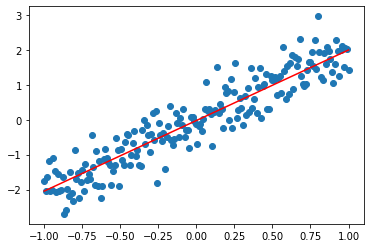

In [ ]:
#Plot the best fit line in a scatter plot here
plt.scatter(x_train, y_train)
y_learned = x_train*w+b
plt.plot(x_train, y_learned, 'r')
plt.show()


You should see the following graph with the best fit line.

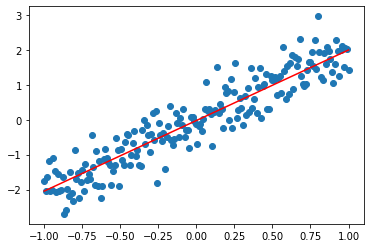

As can be seen from the figure, we are reasonably sure that our model fits the data.

# Part 2: Multiple Linear Regression

Let us now apply what we have learnt on dataset with multiple input features and this time we will use some data from a file instead of randomly generated values.

## Loading Data

Make sure that you have a copy of _InsuranceClaim.csv_ file.

Add the following codes to read in and print the data:

```python
import io
from google.colab import files

#Prompt for file and Upload the data
upload = files.upload()
# Read in the data, each data item is separated (delimited) by a comma (,) character
# We will also exclude the first row containing the headers
data=np.loadtxt('InsuranceClaim.csv',delimiter=',',skiprows=1)

print(data)
```

Run the codes, and select your copy of InsuranceClaim.csv file when prompted.

Note ```[1:]``` is added at the end since the file contains a header row and we have to remove it from our data. Numpy does not work with text data.

In [ ]:
#Enter your codes here
import numpy as np
import io
from google.colab import files

# Prompt for file and Upload the data
upload = files.upload()
# Read in the data, each data item is separated (delimited) by a comma (,) character
# We will also exclude the first row containing the headers
data=np.loadtxt('InsuranceClaim.csv',delimiter=',',skiprows=1)

print(data)


Saving InsuranceClaim.csv to InsuranceClaim (3).csv
[[0.0000e+00 2.3000e+01 2.0000e+00 3.6190e+03]
 [1.0000e+00 2.0000e+01 3.0000e+00 4.5906e+03]
 [1.0000e+00 2.9000e+01 1.0000e+00 3.8500e+03]
 ...
 [0.0000e+00 3.5000e+01 2.0000e+00 3.5000e+03]
 [0.0000e+00 2.0000e+01 2.0000e+00 5.2346e+03]
 [0.0000e+00 3.6000e+01 3.0000e+00 5.6126e+03]]


The ```InsuranceClaim.csv``` file contains data pertaining to hospitalization insurance claims. You should see that there are 4 columns

```
[[0.0000e+00 2.3000e+01 2.0000e+00 3.6190e+03]
 [1.0000e+00 2.0000e+01 3.0000e+00 4.5906e+03]
 [1.0000e+00 2.9000e+01 1.0000e+00 3.8500e+03]
 ...
 [0.0000e+00 3.5000e+01 2.0000e+00 3.5000e+03]
 [0.0000e+00 2.0000e+01 2.0000e+00 5.2346e+03]
 [0.0000e+00 3.6000e+01 3.0000e+00 5.6126e+03]]
```

The first 3 columns are the input features.
```
Column 1 - ASG (Admission severity group)
Column 2 - Age (Patient's age)
Column 3 - LOS (Length of stay)
```

The fourth column is the claim amount which is what we will want to predict.


|ASG|AGE |LOS| CLAIM |
|---|----|---|-------|
|0.0|23.0|2.0|3619.00|
|1.0|20.0|3.0|4590.60|

In the next few sections, we will convert the data as follows
1. Apply one-hot coding on ASG and thus expanding the ASG column from one to three columns.
2. Combine the 3 ASG columns with AGE and LOS to form ```train_x```.
3. Split the claim coilumn to form label ```train_y```.

|ASG_0|ASG_1|ASG_2|AGE |LOS|
|-----|-----|-----|----|---|
|  1  |  0  |  0  |23.0|2.0|
|  0  |  1  |  0  |20.0|3.0|
Table: train_x


| CLAIM |
|-------|
|3619.00|
|4590.60|
Table: train_y


## One-hot Encoding

The ASG column has three different values for the severity of illness, we can apply _one-hot encoding_ to the column  using the following codes:

```python
ASG_COLUMN_INDEX = 0
#Create a zero numpy array of shape (number of example, number of features)
sample_count = data.shape[0]
#Create a 3 column array because there are 3 possible values of ASG
#All values in the array are changed to 0
one_hot = np.zeros((sample_count, 3))
#For every row, set one of the columns (0, 1, 2) to 1 
#depending on the values of ASG
#For example, if ASG = 2, the column 2 will be set to 1
one_hot[np.arange(sample_count), data[:,ASG_COLUMN_INDEX].astype("int32")] = 1
print(one_hot)
```

In [ ]:
#Generate the one-hot encoded ASG columns here

ASG_COLUMN_INDEX = 0
# Create a zero numpy array of shape (number of example, number of features)
sample_count = data.shape[0]
# Create a 3 column array because there are 3 possible values of ASG
# All values in the array are changed to 0
one_hot = np.zeros((sample_count, 3))
# For every row, set one of the columns (0, 1, 2) to 1 
# depending on the values of ASG
# For example, if ASG = 2, the column 2 will be set to 1
print(type(data[1,0]))
one_hot[np.arange(sample_count), data[:,ASG_COLUMN_INDEX].astype("int32")] = 1
print(one_hot)

<class 'numpy.float64'>
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0.

You should be able to see that we now have 3 columns of one-hot encoded columns for ASG column.

### Input Features (train_x)

We will now combine 3 columns of ASG with AGE and LOS to form ```train_x```.

Let us now add the other 2 input columns to the ASG columns to form our training data:

```python
#Concatenate one_hot and columns 1 (AGE) and 2 (LOS) into train_x
train_x = np.concatenate((one_hot, data[:, [1, 2]]), axis=1)
print(train_x)
```

In [ ]:
#Enter your codes here
# Concatenate one_hot and columns 1 (AGE) and 2 (LOS) into train_x
train_x = np.concatenate((one_hot, data[:, [1, 2]]), axis=1)
print(train_x)


[[ 1.  0.  0. 23.  2.]
 [ 0.  1.  0. 20.  3.]
 [ 0.  1.  0. 29.  1.]
 ...
 [ 1.  0.  0. 35.  2.]
 [ 1.  0.  0. 20.  2.]
 [ 1.  0.  0. 36.  3.]]


You should see your ```train_x``` as shown below:
```
[[ 1.  0.  0. 23.  2.]
 [ 0.  1.  0. 20.  3.]
 [ 0.  1.  0. 29.  1.]
 ...
 [ 1.  0.  0. 35.  2.]
 [ 1.  0.  0. 20.  2.]
 [ 1.  0.  0. 36.  3.]]
```

It now consists of 5 columns. 3 columns for ASG followed by ```AGE``` age and ```LOS``` length of stay.

### Label ```train_y```

Let us now create ```train_y``` which is simply the column 3 from our data.

```python
#Get all all rows in column 3 from our data.
train_y = data[:, [3]]
print(train_y)
```

In [ ]:
#Enter your codes to extract train_y here
train_y = data[:, [3]]
print(train_y)


[[ 3619. ]
 [ 4590.6]
 [ 3850. ]
 [11187.4]
 [ 4368. ]
 [ 5763.8]
 [ 5108.6]
 [ 4582.2]
 [ 4677.4]
 [ 3904.6]
 [ 5170.2]
 [ 3362.8]
 [ 3785.6]
 [ 3490.2]
 [ 4410. ]
 [ 7305.2]
 [ 4214. ]
 [ 3348.8]
 [ 3739.4]
 [ 4849.6]
 [ 3533.6]
 [ 4890.2]
 [ 4460.4]
 [ 3395. ]
 [ 3140.2]
 [ 3249.4]
 [ 3831.8]
 [ 4134.2]
 [ 5002.2]
 [ 4124.4]
 [ 4298. ]
 [ 3983. ]
 [ 4627. ]
 [ 4384.8]
 [ 6546.4]
 [ 3635.8]
 [ 3670.8]
 [ 3239.6]
 [ 3339. ]
 [ 4277. ]
 [ 5357.8]
 [ 3278.8]
 [ 4732. ]
 [ 3036.6]
 [ 3858.4]
 [ 3470.6]
 [ 4636.8]
 [ 2742.6]
 [ 4723.6]
 [ 4004. ]
 [ 5485.2]
 [ 3757.6]
 [ 1968.4]
 [ 3883.6]
 [ 3500. ]
 [ 5728.8]
 [ 3626. ]
 [ 5467. ]
 [ 4354. ]
 [ 5891.2]
 [ 3519.6]
 [ 4545.8]
 [ 3638.6]
 [ 4284. ]
 [ 4005.4]
 [ 5042.8]
 [ 4184.6]
 [ 3813.6]
 [ 5432. ]
 [ 4055.8]
 [ 6022.8]
 [ 4834.2]
 [ 3789.8]
 [ 4201.4]
 [ 3778.6]
 [ 4320.4]
 [ 4537.4]
 [ 3815. ]
 [ 5112.8]
 [ 5940.2]
 [ 5441.8]
 [ 5385.8]
 [ 6095.6]
 [ 3586.8]
 [ 3718.4]
 [ 4638.2]
 [ 4776.8]
 [ 6606.6]
 [ 4250.4]
 [ 3666.6]
 [ 3873.8]

## Exercise

Follows the same approach as previous simple linear regression case to train and get the optimal values for w and b. You will need to modify the codes to support multiple variables for train_x.

Note the following:

1. Set learning rate to 0.0001
2. Set epoch to 10
3. Initialize w to be np.zeros(1, 5)
4. Initialize b using a random number generator ```np.random.randn()```
5. In the loss function, use ```tf.matmul``` to multiply w and x
6. In the loss function, use ```tf.reduce_sum``` to sum up all the elements in the tensor


<details>
    <summary><strong>You can click here for the answer</strong></summary>

```python
#Set the learning rates
learning_rate = 0.0001
#Set the number of iterations
epochs = 10

#Define Parameters to be Trained
#Variable W is the parameters of the regression equation
#We initialize it to zero
W = tf.Variable(np.zeros((1, 5)), name = "W", dtype=tf.float64, trainable=True)
#Variable b is the intercept, initialize to random number
b = tf.Variable(np.random.randn(), name = "b", dtype=tf.float64, trainable=True)

#Loss Function
#=============
#Loss function is the squared of the sum of differences between actual and predicted values
#tf.matmul(W, X) + b is the predicted value of y
#reduce_sum calculates sums up across elements in the tensor

#Use a Stochastic Gradient Descent optimizer to minimize the loss function
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate)
    
#Training
for ep in range(epochs):
    print("Epoch:", ep, end="\r")
    for (x, y) in zip(train_x, train_y):
        X = tf.Variable(x.reshape(5, 1), name="X", dtype=tf.float64, trainable=False)
        Y = tf.Variable(y, name="Y", dtype=tf.float64, trainable=False)
        loss = lambda: tf.reduce_sum((tf.matmul(W, X) + b - Y)**2)
        sgd_optimizer.minimize(loss, [W, b])


print(W)
print(b)
```
<details>


In [ ]:
import tensorflow as tf
#Enter your codes here
# Set the learning rates
learning_rate = 0.0001
# Set the number of iterations
epochs = 10

# Define Parameters to be Trained
# Variable W is the parameters of the regression equation
# We initialize it to zero
W = tf.Variable(np.zeros((1, 5)), name = "W", dtype=tf.float64, trainable=True)
# Variable b is the intercept, initialize to random number
b = tf.Variable(np.random.randn(), name = "b", dtype=tf.float64, trainable=True)

# Loss Function
# =============
# Loss function is the squared of the sum of differences between actual and predicted values
# tf.matmul(W, X) + b is the predicted value of y
# reduce_sum calculates sums up across elements in the tensor

# Use a Stochastic Gradient Descent optimizer to minimize the loss function
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate)

# Training
for ep in range(epochs):
    print("Epoch:", ep, end="\r")
    for (x, y) in zip(train_x, train_y):
        X = tf.Variable(x.reshape(5, 1), name="X", dtype=tf.float64, trainable=False)
        Y = tf.Variable(y, name="Y", dtype=tf.float64, trainable=False)
        #loss = lambda : (Y - (np.matmul(W,X) + b))**2
        #loss = lambda: (Y-tf.matmul(W, X) + b)**2
        loss = lambda: tf.reduce_sum((tf.matmul(W, X) + b - Y)**2)

        sgd_optimizer.minimize(loss, [W, b])


print(W)
print(b)


<tf.Variable 'W:0' shape=(1, 5) dtype=float64, numpy=
array([[  2.59977608,  95.55369984,  -2.02325563, 112.09882687,
        378.84890502]])>
<tf.Variable 'b:0' shape=() dtype=float64, numpy=95.93991760445512>


You should see similar results as follows:

```
<tf.Variable 'W:0' shape=(1, 5) dtype=float64, numpy=
array([[  2.58656098,  95.54219405,  -2.02134375, 112.06315579,
        378.80855993]])>
<tf.Variable 'b:0' shape=() dtype=float64, numpy=97.16121332933334>

```

From the above result, we get our regression coeffients as

```2.58656098,  95.54219405,  -2.02134375, 112.06315579, 378.80855993```

and our intercept is ```97.16121332933334```.

## Exercise 2

Use your model to predict the insurance claim for patient with admission severity group 0, age 23 and length of stay 3.
Your values should be between 3600 and 4500.

```
predicted value = x_test * w + b
```

<details>
    <summary><strong>You can click here for the answer</strong></summary>


```
x_test = np.array([1, 0, 0, 23, 3], dtype=np.float64).reshape(5, 1)
(tf.matmul(W, x_test) + b).numpy()[0][0]
```
<details>


In [ ]:
#Enter your codes here
x_test = np.array([1, 0, 0, 23, 3], dtype=np.float32).reshape(5, 1)
#(tf.matmul(W, x_test) + b).numpy()[0][0]
(tf.matmul(W, x_test) + b).numpy()

array([[3813.35942681]])

# Using tf.data

In this section, we will run some of the codes seen in the lecture to see how they work.

In [ ]:
X = tf.range(10) # any data tensor
dataset = tf.data.Dataset.from_tensor_slices(X) 
#dataset = tf.data.Dataset.range(10) 

for item in dataset:
  print(item)


tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [ ]:
dataset = dataset.repeat(3).batch(7, drop_remainder=True) #drop_remainder=True for equal size batch
for item in dataset:
   print(item)



tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)


In [ ]:
dataset = tf.data.Dataset.range(10) 
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
  print (item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)


In [ ]:
dataset = dataset.filter(lambda x: x < 10)
for item in dataset:
  print (item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


# Using TFRecord

Let us now look at the codes from the lecture using TFRecord.

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example
person_example = Example(
  features=Features(
    feature={
      "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
      "id": Feature(int64_list=Int64List(value=[123])),
      "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",b"c@d.com"]))
}))

In [ ]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
  f.write(person_example.SerializeToString())

In [ ]:
feature_description = {
  "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
  "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
  "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
  parsed_example = tf.io.parse_single_example(serialized_example, feature_description)


In [ ]:
print(parsed_example)

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x7f6f955e3d50>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}


# Using TFRecord for storing image data

- Use tf.io.TFRecordWriter to open the tfrecord file and start writing.

- Before writing into tfrecord file, the image data and label data should be converted into proper datatype. (byte, int, float)

- Now the datatypes are converted into tf.train.Feature

- Finally create an Example Protocol Buffer using tf.Example and use the converted features into it. Serialize the Example using serialize() function.

- Write the serialized Example.

apple3.jpg


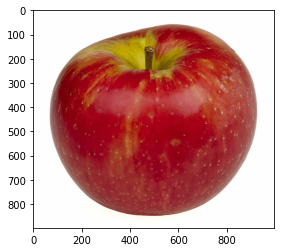

orange2.jpg


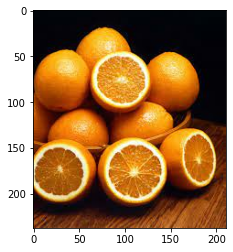

apple.jpg


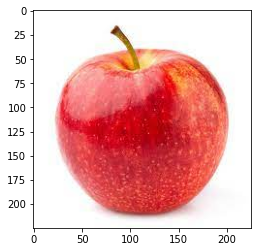

apple2.jpg


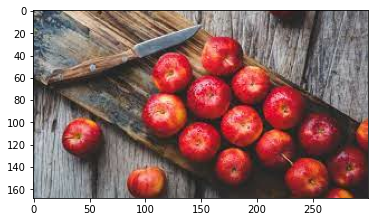

orange.jpg


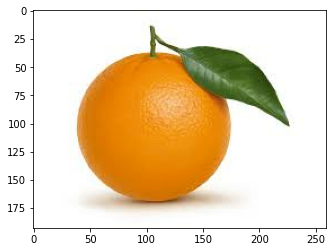

In [10]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

import glob

from PIL import Image

# Converting the values into features
# _int64 is used for numeric values

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# _bytes is used for string/char values

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

tfrecord_filename = 'something.tfrecords'

# Initiating the writer and creating the tfrecords file.

writer = tf.io.TFRecordWriter(tfrecord_filename)

# Loading the location of all files - image dataset
# Considering our image dataset has apple or orange
# The images are named as apple01.jpg, apple02.jpg .. , orange01.jpg .. etc.

images = glob.glob('*.jpg')

for image in images:
  print(image)
  f=open(image,'rb')
  img=f.read()

  img2=tf.image.decode_jpeg(img)
  img2=img2.numpy()
  plt.imshow(img2)
  plt.show()
  
  label = 0 if 'apple' in image else 1
  feature = { 'label': _int64_feature(label),
              #'image': _bytes_feature(img.tostring()) }
              'image': _bytes_feature(img) }

# Create an example protocol buffer

  example = tf.train.Example(features=tf.train.Features(feature=feature))

# Writing the serialized example.

  writer.write(example.SerializeToString())

writer.close()

# To read from TFRecord

Use tf.image.decode_jpeg to convert bytes to tensor and subsequently to numpy array if required

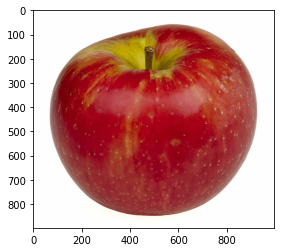

tf.Tensor(0, shape=(), dtype=int64)


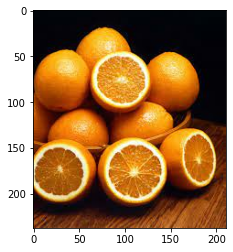

tf.Tensor(1, shape=(), dtype=int64)


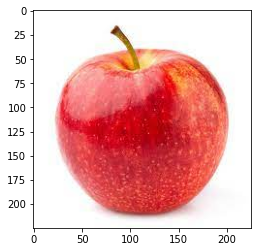

tf.Tensor(0, shape=(), dtype=int64)


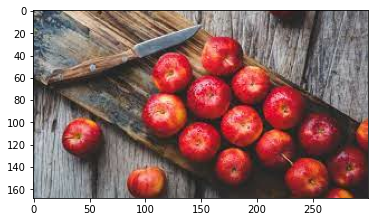

tf.Tensor(0, shape=(), dtype=int64)


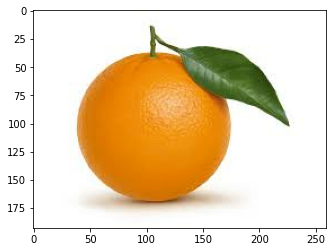

tf.Tensor(1, shape=(), dtype=int64)


In [12]:
import tensorflow as tf 
import glob
import io
import IPython.display as display

filenames = glob.glob('*.tfrecords')

feature_set = { 'image': tf.io.FixedLenFeature([], tf.string),
               'label': tf.io.FixedLenFeature([], tf.int64)
           }

for serialized_example in tf.data.TFRecordDataset(filenames):
  parsed_example = tf.io.parse_single_example(serialized_example, feature_set)           
  label = parsed_example['label']
  image = parsed_example['image']

  img2=tf.image.decode_jpeg(image)
  img2=img2.numpy()

  plt.imshow(img2)
  plt.show()
  print(label)

# Conclusion

In this practical, we have seen how to use the optimizer provided by the Tensorflow to find the parameters that minimizes a defined cost function.

We have applied this to first a simple linear equation with generated data. This is then extended to a multiple linear regresssion using the insurance claim dataset.  Finally we see how to perfom a prediction using the trained regression model.

We have also seen how tf.data and TFRecord can be used for loading and reading data.
